In [ ]:
import sys
import os
import os.path as op

import numpy as np
import pandas as pd
import datetime
import netCDF4 as netcdf
from datetime import timedelta
from math import pi
import xarray as xr
import glob

# dev library
import sys
sys.path.insert(0, op.join(os.path.abspath(''), '..'))

# dependencies
from lib import wrapSpectra, spectra, sat, plot_sat, model
from lib.config import * 


# Satellite-model correlation in energy quantity and arrival time

In [2]:
ds_data = xr.open_dataset(op.join(p_output, 'ds_dataTracks.nc'))
ds_energy = xr.open_dataset(op.join(p_output, 'energy_BINS.nc'))
ds_params = xr.open_dataset(op.join(p_output, 'params_BINS.nc'))

## Diagnostic charts

**Bearing 1**

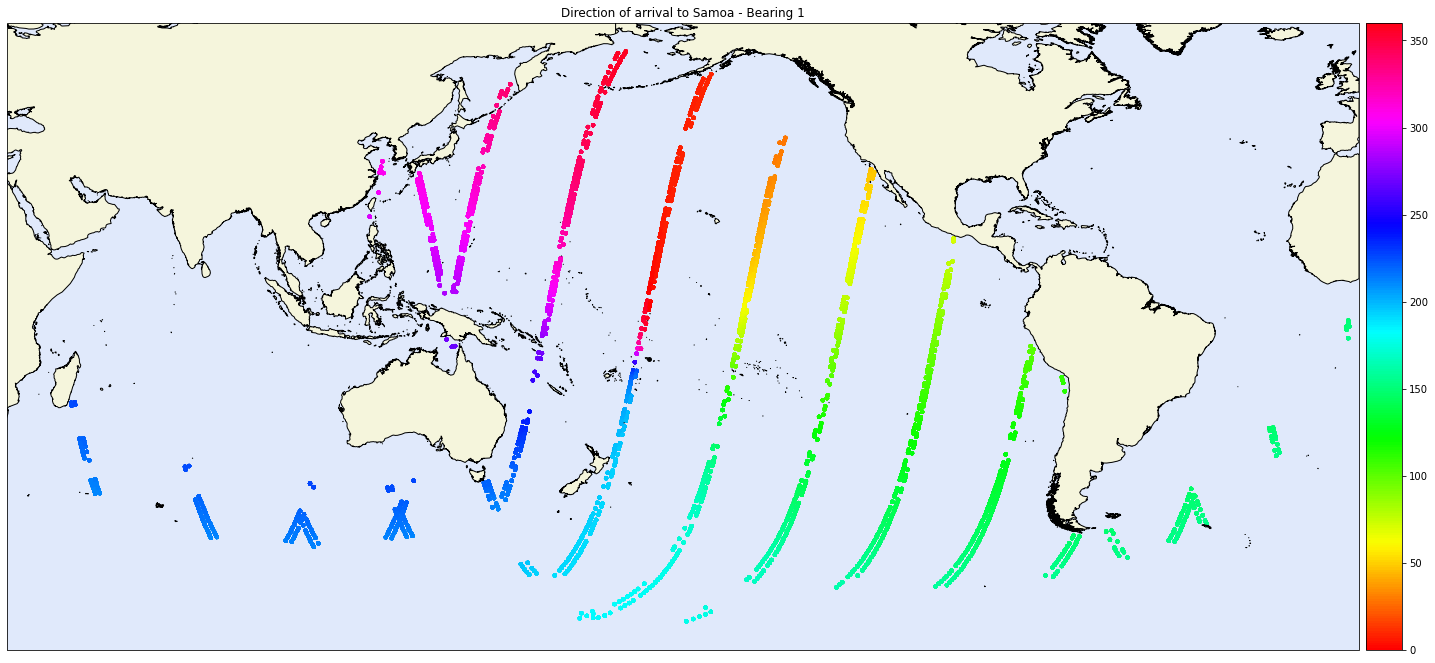

In [5]:
ds_ex = ds_energy.isel(file=slice(0,10)).to_dataframe().dropna()

figsize=(25,15)
title = 'Direction of arrival to Samoa - Bearing 1'
cmap = 'hsv'
vmin, vmax = 0, 360
fig, ax = plot_sat.attrs_map(
                            ds_ex.longitude.values, 
                            ds_ex.latitude.values, 
                            ds_ex['bearing1'].values, figsize, title,
                            cmap, vmin, vmax
)

**Distance**

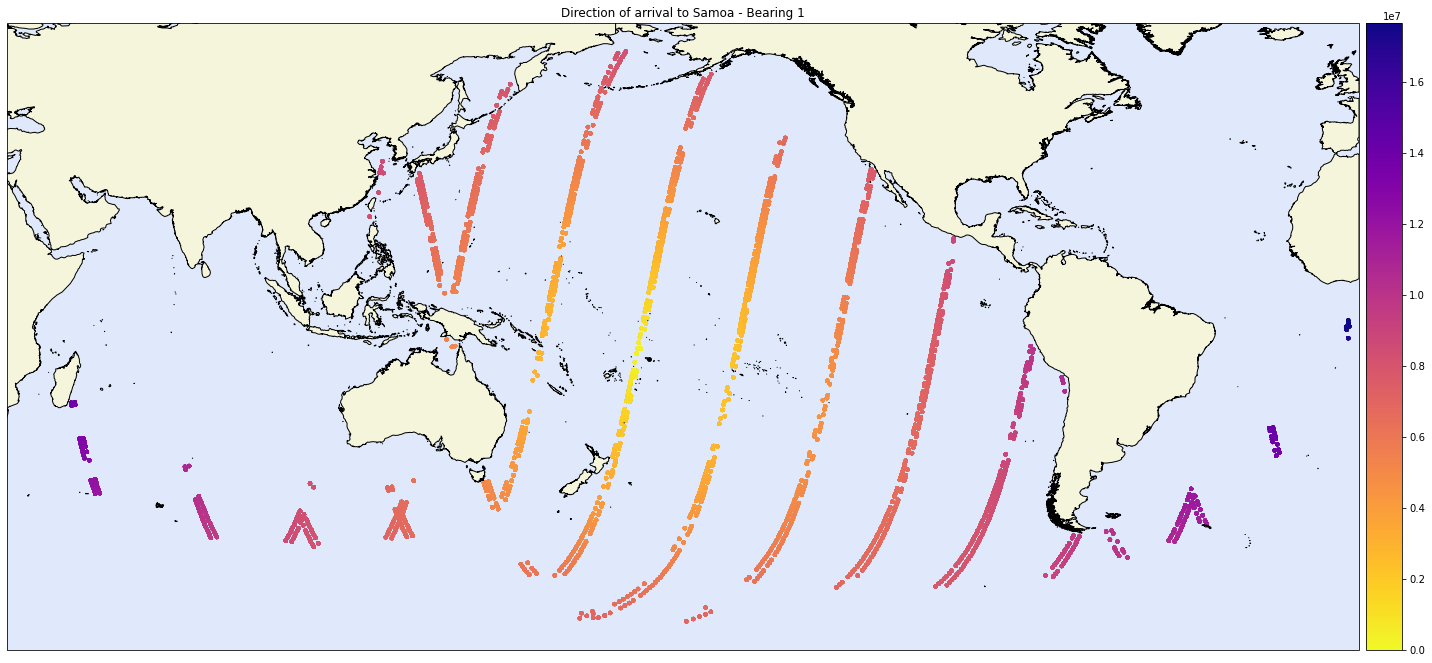

In [6]:
ds_ex = ds_energy.isel(file=slice(0,10)).to_dataframe().dropna()

figsize=(25,15)
title = 'Direction of arrival to Samoa - Bearing 1'
cmap = 'plasma_r'
vmin, vmax = 0, np.nanmax(ds_ex.distance.values)
fig, ax = plot_sat.attrs_map(
                            ds_ex.longitude.values, 
                            ds_ex.latitude.values, 
                            ds_ex['distance'].values, figsize, title,
                            cmap, vmin, vmax
)

### Satellite energy measured in a defined time frame

In [3]:
time_ini = datetime.datetime(2021, 2, 27, 0, 0)
time_fin = time_ini + datetime.timedelta(days=3)

In [4]:
n_files = 20

In [5]:
df_time = ds_params[['time', 'Ttime']].isel(file=slice(0, n_files)).to_dataframe()
df_time['date'] = pd.to_timedelta(df_time['Ttime'], unit='s') + df_time['time']

In [6]:
df_energy = ds_energy[['slopeD', 'longitude', 'latitude']].isel(file=slice(0,n_files)).to_dataframe()
df_energy['date'] = df_time['date']
df_energy.dropna(inplace=True)

In [7]:
sel_df = df_energy.loc[(df_energy.date > time_ini) & (df_energy.date < time_fin)].sort_values('slopeD')

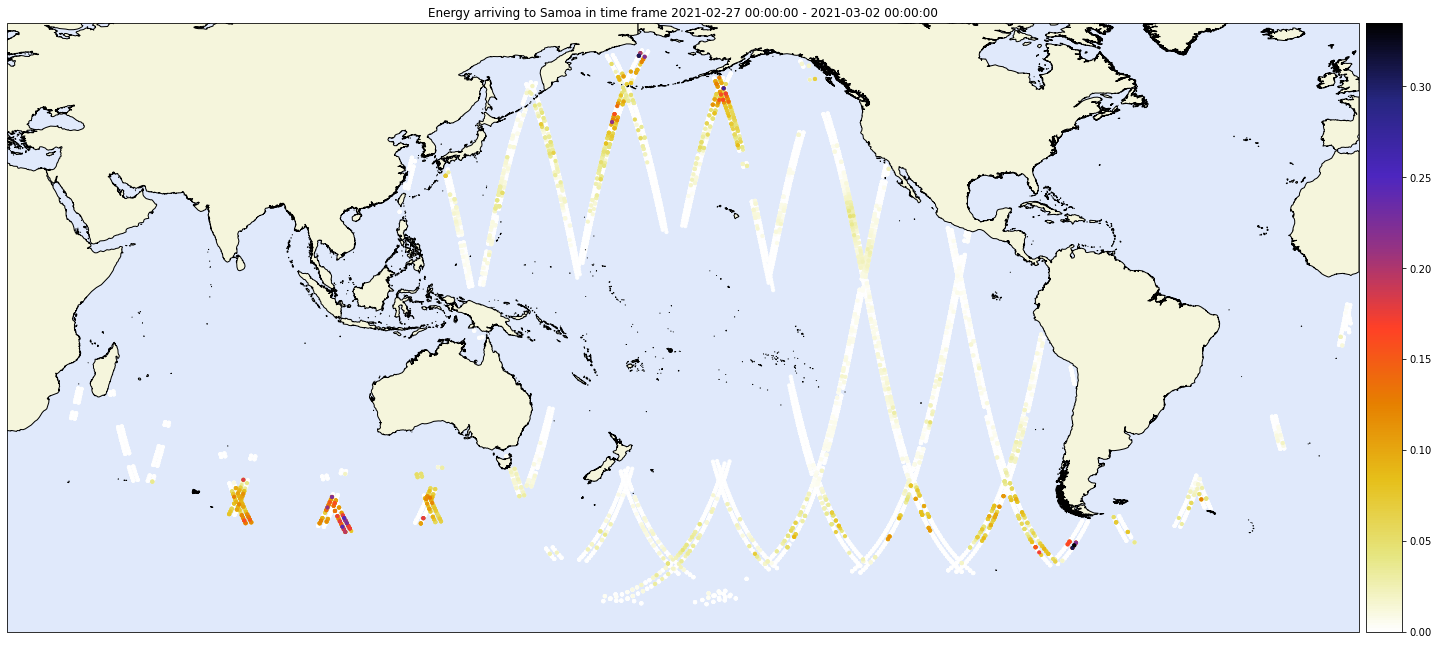

In [9]:
figsize=(25,15)
title = 'Energy arriving to Samoa in time frame {0} - {1}'.format(time_ini, time_fin)
cmap = 'CMRmap_r'
vmin, vmax = 0, sel_df.slopeD.max()
fig, ax = plot_sat.attrs_map(
                            sel_df.longitude.values, 
                            sel_df.latitude.values, 
                            sel_df['slopeD'].values, figsize, title,
                            cmap, vmin, vmax
)

## Instant satellite energy measured 

In [6]:
part_k = ds_params[['SWH(m)', 'H_sinNu']]
part_k_coords = xr.combine_by_coords([part_k, ds_data])

In [ ]:
DF = pd.DataFrame()
for pfile, file in enumerate(part_k_coords.file.values):
    df_file = part_k_coords.isel(file=0).to_dataframe().dropna()
    DF.append(df_file.loc[(df_file.time > time_ini) & (df_file.time < time_fin)])
    

### WW3 Model output

In [ ]:
glob.glob(op.join(ww3_path, 'MARC_WW3-GLOB-30M_20210223*'))

In [ ]:
for file in os.listdir(ww3_path):
    date = file.split('WW3-GLOB-30M_')[1][:-3]
    date = np.datetime64(pd.to_datetime(date))

    if (date >= time_ini) & (date <= time_fin):
        print(date)
        break
file_ww3 = xr.open_dataset(op.join(ww3_path, file))

**Hs**

In [ ]:
df_ww3 = file_ww3[['hs']].to_dataframe().dropna().reset_index()

figsize=(7,7)
title = 'Energy in time frame {0} - {1}'.format(time_ini, time_fin)
cmap = 'CMRmap_r'
vmin, vmax = 0, 6#df_ww3.hs.max()
fig, ax = plot_sat.attrs_map(
                            df_ww3.longitude.values, 
                            df_ww3.latitude.values, 
                            df_ww3['hs'].values, figsize, title,
                            cmap, vmin, vmax, 
)
ax.set_extent([site_lon-15, site_lon+15, site_lat-15, site_lat+15])

**T02**

In [ ]:
df_ww3 = file_ww3[['t02']].to_dataframe().dropna().reset_index()

figsize=(7,7)
title = 'Energy in time frame {0} - {1}'.format(time_ini, time_fin)
cmap = 'jet'
vmin, vmax = 0, 10#df_ww3.t02.max()
fig, ax = plot_sat.attrs_map(
                            df_ww3.longitude.values, 
                            df_ww3.latitude.values, 
                            df_ww3['t02'].values, figsize, title,
                            cmap, vmin, vmax, 
)
ax.set_extent([site_lon-15, site_lon+15, site_lat-15, site_lat+15])

**Dir**

In [ ]:
df_ww3 = file_ww3[['dp']].to_dataframe().dropna().reset_index()

figsize=(7,7)
title = 'Energy in time frame {0} - {1}'.format(time_ini, time_fin)
cmap = 'hsv'
vmin, vmax = 0, df_ww3.dp.max()
fig, ax = plot_sat.attrs_map(
                            df_ww3.longitude.values, 
                            df_ww3.latitude.values, 
                            df_ww3['dp'].values, figsize, title,
                            cmap, vmin, vmax, 
)
ax.set_extent([site_lon-15, site_lon+15, site_lat-15, site_lat+15])